In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from pathlib import Path

from src.paths import project_dir
from src.datasets.spheres_dataset import SpheresDataset
from src.preprocessing.main_create_v7_spheres_dataset import get_interfacetype_epsilon_from_outdir

logging.basicConfig(level=logging.INFO)

In [2]:
base_dir = Path('./../../src/preprocessing/data/spheres')
dir_list = list(base_dir.iterdir())
dir_list

[PosixPath('../../src/preprocessing/data/spheres/TANH_EPSILON0.0078125'),
 PosixPath('../../src/preprocessing/data/spheres/SIGNED_DISTANCE_APPROXIMATE'),
 PosixPath('../../src/preprocessing/data/spheres/TANH_EPSILON0.015625'),
 PosixPath('../../src/preprocessing/data/spheres/SIGNED_DISTANCE_EXACT'),
 PosixPath('../../src/preprocessing/data/spheres/TANH_EPSILON0.0625'),
 PosixPath('../../src/preprocessing/data/spheres/TANH_EPSILON0.03125'),
 PosixPath('../../src/preprocessing/data/spheres/HEAVISIDE')]

In [5]:
interface_type_list = [get_interfacetype_epsilon_from_outdir(d) for d in dir_list]
interface_type_list

[(<InterfaceType.TANH_EPSILON: 1>, 0.0078125),
 (<InterfaceType.SIGNED_DISTANCE_APPROXIMATE: 3>, None),
 (<InterfaceType.TANH_EPSILON: 1>, 0.015625),
 (<InterfaceType.SIGNED_DISTANCE_EXACT: 2>, None),
 (<InterfaceType.TANH_EPSILON: 1>, 0.0625),
 (<InterfaceType.TANH_EPSILON: 1>, 0.03125),
 (<InterfaceType.HEAVISIDE: 4>, None)]

In [6]:
datasets = [
    SpheresDataset(data_dir=d, split='train', debug=True) for d in dir_list
]

INFO:src.datasets.spheres_dataset:Constructed splits of size (number of runs NOT snapshots): train=8, val=2
INFO:src.datasets.spheres_dataset:Loaded 3 files for split train
INFO:src.datasets.spheres_dataset:First file: ../../src/preprocessing/data/spheres/TANH_EPSILON0.0078125/spheres_9.npz
INFO:src.datasets.spheres_dataset:Generated 3 samples of ellipse data
INFO:src.datasets.spheres_dataset:Each sample has shape torch.Size([1, 64, 64, 64])
INFO:src.datasets.spheres_dataset:Constructed splits of size (number of runs NOT snapshots): train=8, val=2
INFO:src.datasets.spheres_dataset:Loaded 3 files for split train
INFO:src.datasets.spheres_dataset:First file: ../../src/preprocessing/data/spheres/SIGNED_DISTANCE_APPROXIMATE/spheres_9.npz
INFO:src.datasets.spheres_dataset:Generated 3 samples of ellipse data
INFO:src.datasets.spheres_dataset:Each sample has shape torch.Size([1, 64, 64, 64])
INFO:src.datasets.spheres_dataset:Constructed splits of size (number of runs NOT snapshots): train=8, 

In [7]:
# First, check that all datasets have same length
lengths = [len(d) for d in datasets]
lengths

[3, 3, 3, 3, 3, 3, 3]

In [8]:

def visualise_dataset_sample(arr):
    arr = arr.squeeze()

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    im = axs[0].imshow(arr[32, :, :])
    fig.colorbar(im, ax=axs[0])
    im = axs[1].imshow(arr[:, 32, :])
    fig.colorbar(im, ax=axs[1])
    im = axs[2].imshow(arr[:, :, 32])
    fig.colorbar(im, ax=axs[2])
    plt.show()
    plt.close()


In [16]:
# Visualise first sample from each dataset

for dataset, it in zip(datasets, interface_type_list):
    print(it)
    visualise_dataset_sample(dataset[3])

(<InterfaceType.TANH_EPSILON: 1>, 0.0078125)


IndexError: list index out of range

In [11]:
def visualise_grad_magnitude(arr):
    dx = 1 / 64
    arr = arr.squeeze()
    grad = np.gradient(arr, dx)
    grad_magnitude = np.sqrt(np.sum(np.square(grad), axis=0))

    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    im = axs[0].imshow(grad_magnitude[32, :, :])
    fig.colorbar(im, ax=axs[0])
    im = axs[1].imshow(grad_magnitude[:, 32, :])
    fig.colorbar(im, ax=axs[1])
    im = axs[2].imshow(grad_magnitude[:, :, 32])
    fig.colorbar(im, ax=axs[2])
    plt.show()
    plt.close()

(<InterfaceType.TANH_EPSILON: 1>, 0.0078125)


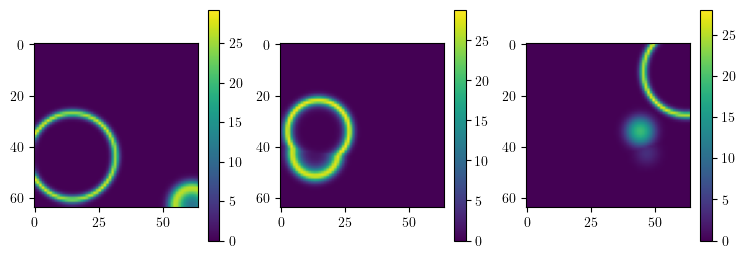

(<InterfaceType.SIGNED_DISTANCE_APPROXIMATE: 3>, None)


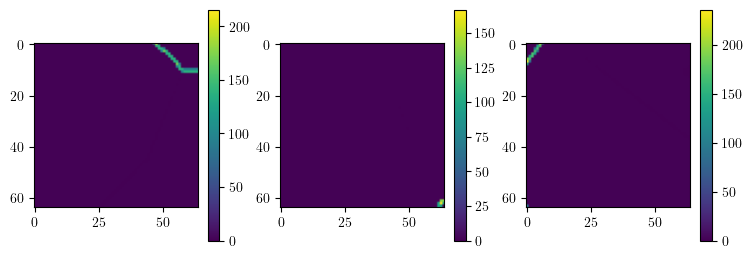

(<InterfaceType.TANH_EPSILON: 1>, 0.015625)


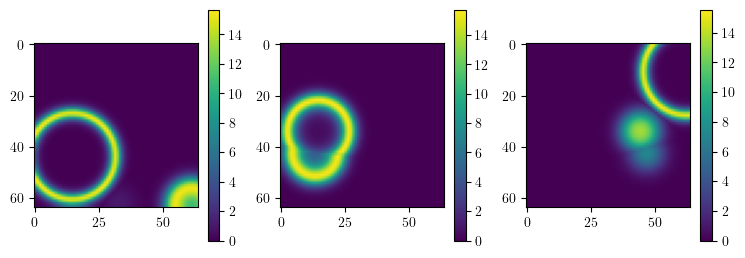

(<InterfaceType.SIGNED_DISTANCE_EXACT: 2>, None)


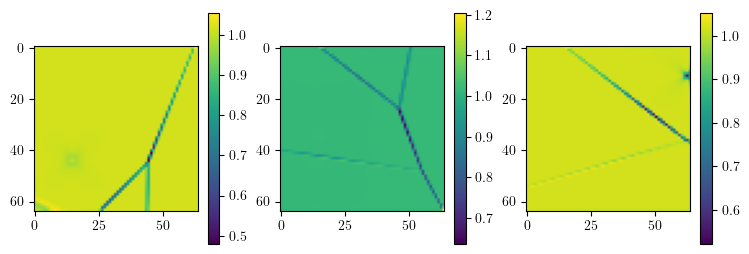

(<InterfaceType.TANH_EPSILON: 1>, 0.0625)


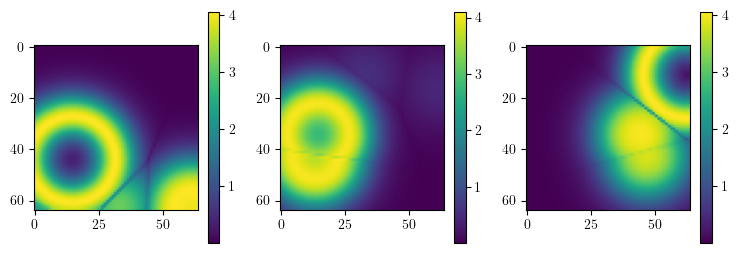

(<InterfaceType.TANH_EPSILON: 1>, 0.03125)


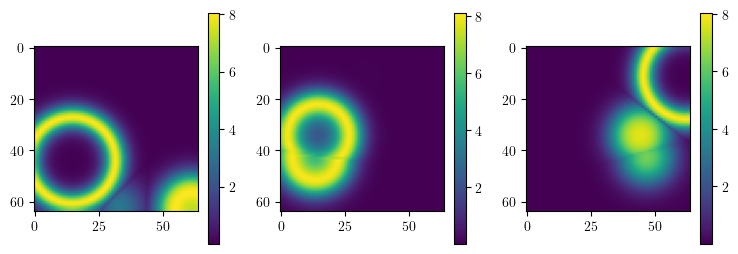

(<InterfaceType.HEAVISIDE: 4>, None)


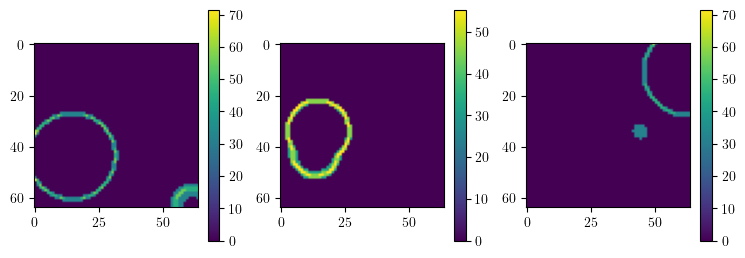

In [12]:
# Visualise gradient magnitude of first sample from each dataset

for dataset, it in zip(datasets, interface_type_list):
    print(it)
    visualise_grad_magnitude(dataset[0])

